In [1]:
import numpy as np
import scipy.spatial as sp
import pandas as pd
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

In [3]:
test_inputs = np.loadtxt('ML _dataset/test_inputs').reshape(-1,1)
train_inputs = np.loadtxt('ML _dataset/train_inputs').reshape(-1,1)
train_outputs = np.loadtxt('ML _dataset/train_outputs').reshape(-1,1)

In [4]:
def K(X, X_star, length_scale, p):
    """
    Implements SE cov function
    
    X: nxd array
    X_star: mxd array
    length_scale: lengle scale
    
    Return: n x m array
    """
    dist = sp.distance.cdist(X,X_star)
    first = np.exp(-dist**2/(2*length_scale**2))
    second = np.exp((-2*(np.sin(np.pi*(dist/p)))**2)/(length_scale**2))
    return first*second

In [7]:
test_q1 = K(test_inputs,test_inputs,2.0,5)
len(test_q1)

301

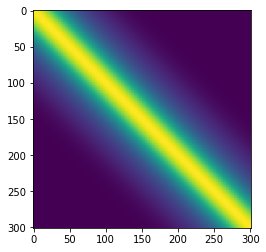

In [8]:
plt.imshow(test_q1)

In [9]:
def sample_prior(X, length_scale, N,p):
    """
    
    Write a function sample prior which accepts three inputs. 
    The first input should be an n × d array X. 
    The second input should be the float l. 
    The third input N should be an integer representing the number of desired samples. 
    The function should return an N × n array representing N samples from the
    GP prior with mean 0 and squared exponential covariance function with length-scale l.
    
     X: n × d array X
     l: length_scale
     N: an integer representing the number of desired samples
     
     Returns:
     N x n array
    """
    k = K(X,X,length_scale,p)
    samples = np.random.multivariate_normal([0]*len(X),k,N)
    return samples

In [10]:
priors = sample_prior(test_inputs, 1.0, 5,3)

Text(0, 0.5, 'outputs, f(x)')

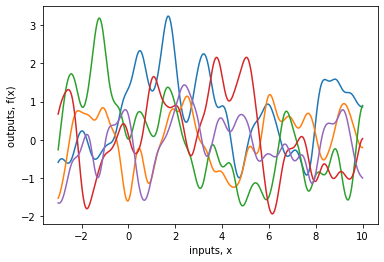

In [11]:
for prior in priors:
    plt.plot(test_inputs, prior)
plt.xlabel('inputs, x')
plt.ylabel('outputs, f(x)')

In [12]:
def predictive_mean(X, y, X_star, length_scale, sigma_n, p):
    """
    Write a function predictive mean implementing equation 2.23 of [1]. 
    The function should take 5 inputs: 
    The n × d array of training input data X, 
    the n × 1 array of training target data y, 
    the m×d array of prediction input data X∗, 
    the float l and the float representing the noise parameter σn. 
    The function should return an m × 1 array representing the mean of the posterior predictive distribution at X∗.
    """
    first = K(X_star, X, length_scale, p)
    second = np.linalg.inv(K(X, X, length_scale, p) + sigma_n ** 2 * np.eye(len(X)))  #identity matrix np.eye
    return np.matmul(first, np.matmul(second,y))

In [13]:
def predictive_cov(X, y, X_star, length_scale, sigma_n, p):
    """
    The function should take 5 inputs: 
    The n × d array of training input data X, 
    the n × 1 array of training target data y, 
    the m × d array of prediction input data X∗, 
    the float l and the float representing the noise parameter σn. 
    The function should return an m × m array representing the covariance 
    of the posterior predictive distribution at X∗.
    """
    first = K(X_star, X_star,length_scale, p)
    second = K(X_star, X, length_scale, p)
    inverted_bit = np.linalg.inv(K(X,X,length_scale, p)+ sigma_n**2* np.eye(len(X)))
    last = K(X,X_star,length_scale, p)
    return first - np.matmul(np.matmul(second,inverted_bit),last)

In [14]:
means = predictive_mean(train_inputs, train_outputs, test_inputs, 2.0, 1.0, 3)
cov = predictive_cov(train_inputs, train_outputs, test_inputs, 2.0, 1.0, 3)
var = np.diag(cov)
std_dev = np.sqrt(var) 
mean = means.reshape((-1,))

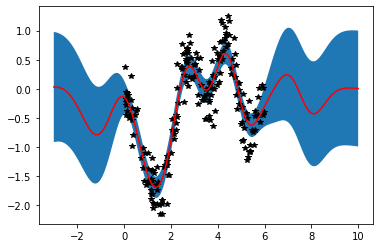

In [15]:
plt.plot(train_inputs,train_outputs,'k*')
plt.plot(test_inputs,means,'r')
plt.fill_between(test_inputs.reshape((-1,)),mean+std_dev,mean-std_dev)

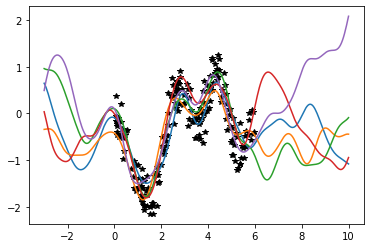

In [16]:
samples = np.random.multivariate_normal(mean,cov,5)
plt.plot(train_inputs,train_outputs,'k*')
for sample in samples:
    plt.plot(test_inputs,sample)

In [17]:
def Kcov(X, X_star, c, d):
    """
    Implements SE cov function
    
    X: nxd array
    X_star: mxd array
    length_scale: lengle scale
    
    Return: n x m array
    
    """
    return (X*X_star+c)**d

In [19]:
test_q1 = Kcov(test_inputs,test_inputs,5,1)

In [20]:
def sample_prior2(X, c, d):
    """
    
    Write a function sample prior which accepts three inputs. 
    The first input should be an n × d array X. 
    The second input should be the float l. 
    The third input N should be an integer representing the number of desired samples. 
    The function should return an N × n array representing N samples from the
    GP prior with mean 0 and squared exponential covariance function with length-scale l.
    
     X: n × d array X
     l: length_scale
     N: an integer representing the number of desired samples
     
     Returns:
     N x n array
    """
    k = Kcov(X,X,c,d)
    samples = np.random.multivariate_normal([0]*len(X),k,d)
    return samples